<a href="https://colab.research.google.com/github/mhdelta/machineLearningUtp/blob/master/svmSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM - Máquinas de soporte vectoriales


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
import scipy.io as sc
from sklearn.metrics import r2_score 

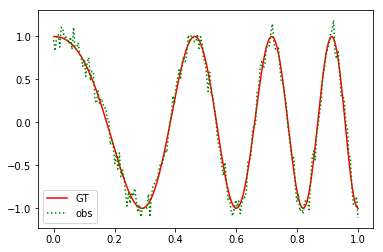

In [8]:
data = sc.loadmat('ejemplo_regresion.mat')
t = data['t']
x = data['x']
tGT = data['y']
plt.plot(x,tGT,'-r')
plt.plot(x,t,':g')
plt.legend(('Ground truth', 'obs'))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 SCORE:  0.9956007089568852


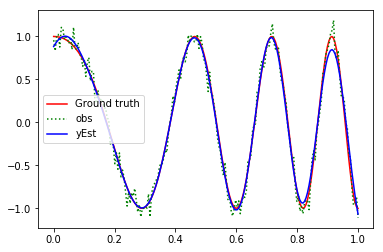

In [95]:
#Crear svr


model = SVR(kernel='rbf', gamma=100)
model.fit(x, t)
yEst = model.predict(x)

plt.plot(x,tGT,'-r')
plt.plot(x,t,':g')
plt.plot(x,yEst,'-b')
plt.legend(('Ground truth', 'obs', 'yEst'))
print('R2 SCORE: ', r2_score(tGT, yEst))

In [0]:
from sklearn.datasets import load_iris
dbIris = load_iris()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

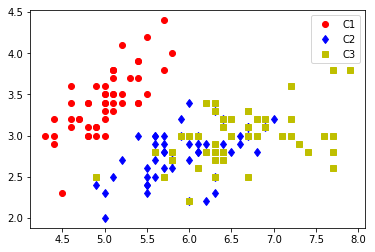

In [105]:
X = dbIris.data
t = dbIris.target
plt.plot(X[0:50,0],X[:50,1], 'or')
plt.plot(X[50:100,0],X[50:100,1], 'db')
plt.plot(X[100:,0],X[100:,1], 'sy')
plt.legend(('C1', 'C2', 'C3'))


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Se realizaŕa validación hold out de 5 repeticiones
reps = 25
accTrain = np.zeros(reps)
accTest = np.zeros(reps)
for rep in range(reps):
    # Seleccionamos el 60% train y 40% test
    Xtrain, Xtest,ytrain,ytest = train_test_split(X,t,test_size=0.5)
    #Construir el modelo
    model = SVC(kernel='poly', gamma=10)
    model.fit(Xtrain, ytrain)
    tEstTr = model.predict(Xtrain)
    tEstTe = model.predict(Xtest)
    accTrain[rep] = accuracy_score(ytrain, tEstTr)
    accTest[rep] = accuracy_score(ytest, tEstTe)

print('Performance train: ', np.mean(accTrain), '+-', np.std(accTrain))
print('Performance test: ', np.mean(accTest), '+-', np.std(accTest))

Performance train:  1.0 +- 0.0
Performance test:  0.9429333333333334 +- 0.02544396894267001
